# Chapter 18 Inheritance

## 18.1 Card Objects

Let's create a representation of a deck of cards. To be able to easily compare cards it is handy to assign an integer value to the suit and rank of each card (spades = 3, hearts = 2, diamonds = 1, clubs = 0)

In [ ]:
class Card:
    """Represents a standard playing card."""
    
    def __init__(self, suit=0, rank = 2): # default is 2 of clubs...
        self.suit = suit
        self.rank = rank
        
queen_of_diamonds = Card(1, 12)


In [ ]:
print(queen_of_diamonds)

## 18.2 Class attributes

A natural and easy way to associate / map ranks and suits to integer values is to use a list.

In [ ]:
# now new and improved!!!
class Card:
    """Represents a standard playing card."""
    
    # with class attributes
    suit_names = ['Clubs', 'Diamonds', 'Hearts', 'Spades']
    rank_names = [None, 'Ace', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'Jack', 'Queen', 'King']
    
    # here we initialize the instance attributes
    def __init__(self, suit=0, rank = 2): # default is 2 of clubs...
        self.suit = suit
        self.rank = rank
        
    def __str__(self):
        return '%s of %s' % (Card.rank_names[self.rank], Card.suit_names[self.suit])
    
queen_of_diamonds = Card(1, 12)
print(queen_of_diamonds)

## 18.3 Comparing cards

For built-in types there are the relational operators (<, >, ==, etc.). We can override the behavior of built-in operators for programmer-defined types by providing a method called `__lt__`. Search for "Python magic methods" or "Python dunder methods" to find out more on these kind of methods.

In [ ]:
# even better this time!!!
class Card:
    """Represents a standard playing card."""
    
    # with class attributes
    suit_names = ['Clubs', 'Diamonds', 'Hearts', 'Spades']
    rank_names = [None, 'Ace', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'Jack', 'Queen', 'King']
    
    # here we initialize the instance attributes
    def __init__(self, suit=0, rank = 2): # default is 2 of clubs...
        self.suit = suit
        self.rank = rank
        
    def __str__(self):
        return '%s of %s' % (Card.rank_names[self.rank], Card.suit_names[self.suit])
    
    def __lt__(self, other):
        # check the suits
        if self.suit < other.suit: return True
        if self.suit > other.suit: return False
        # suits are the same... check ranks
        return self.rank < other.rank


In [ ]:
# but this is more pythonic, using tuple comparison:
class Card:
    """Represents a standard playing card."""
    
    # with class attributes
    suit_names = ['Clubs', 'Diamonds', 'Hearts', 'Spades']
    rank_names = [None, 'Ace', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'Jack', 'Queen', 'King']
    
    # here we initialize the instance attributes
    def __init__(self, suit=0, rank = 2): # default is 2 of clubs...
        self.suit = suit
        self.rank = rank
        
    def __str__(self):
        return '%s of %s' % (Card.rank_names[self.rank], Card.suit_names[self.suit])

    def __lt__(self, other):
        t1 = self.suit, self.rank
        t2 = other.suit, other.rank
        return t1 < t2

c1 = Card(3, 10)
c2 = Card(3, 11)
print(c1, c2)
c1 < c2

## 18.4 Decks

In [ ]:
class Deck:
    def __init__(self):
        self.cards = []
        for suit in range(4):
            for rank in range(1, 14):
                card = Card(suit, rank)
                self.cards.append(card)

In [ ]:
d1 = Deck()

for card in d1.cards:
    print(card)

## 18.5 Printing the deck

In [ ]:
class Deck:
    def __init__(self):
        self.cards = []
        for suit in range(4):
            for rank in range(1, 14):
                card = Card(suit, rank)
                self.cards.append(card)
                
    def __str__(self):
        res = []
        for card in self.cards:
            res.append(str(card))
        return '\n'.join(res) # hey what's happening here?
    
deck = Deck()
print(deck)

## 18.6 Add, remove, shuffle and sort

In [ ]:
# adding a way to deal a card
class Deck:
    def __init__(self):
        self.cards = []
        for suit in range(4):
            for rank in range(1, 14):
                card = Card(suit, rank)
                self.cards.append(card)
                
    def __str__(self):
        res = []
        for card in self.cards:
            res.append(str(card))
        return '\n'.join(res)
    
    def pop_card(self):
        return self.cards.pop() # which card will be dealt?

In [ ]:
# adding a way to add a card

class Deck:
    def __init__(self):
        self.cards = []
        for suit in range(4):
            for rank in range(1, 14):
                card = Card(suit, rank)
                self.cards.append(card)
                
    def __str__(self):
        res = []
        for card in self.cards:
            res.append(str(card))
        return '\n'.join(res)
    
    def pop_card(self):
        return self.cards.pop() 
    
    def add_card(self, card):
        self.cards.append(card) # this is called a veneer

In [ ]:
# and now for something completely different, let's shuffle it up
import random

class Deck:
    def __init__(self):
        self.cards = []
        for suit in range(4):
            for rank in range(1, 14):
                card = Card(suit, rank)
                self.cards.append(card)
                
    def __str__(self):
        res = []
        for card in self.cards:
            res.append(str(card))
        return '\n'.join(res)
    
    def pop_card(self):
        return self.cards.pop() 
    
    def add_card(self, card):
        self.cards.append(card)
        
    # yet another veneer method
    def shuffle(self):
        random.shuffle(self.cards)

In [ ]:
deck = Deck()
deck.shuffle()
card = deck.pop_card()
print(card)

## 18.7 Inheritance

In [ ]:
# let's create a Hand class which inherits from Deck

class Hand(Deck):
    """Represents a hand of playing cards."""
    
# this class is now exactly the same as Deck

hand = Hand()
print(hand)

In [ ]:
# Creating the class with overrides

class Hand(Deck):
    """Represents a hand of playing cards."""
    
    def __init__(self, label=''):
        self.cards = []
        self.label = label
        
hand = Hand('New Hand')
hand.cards


In [ ]:
hand.label

In [ ]:
# let's play

deck = Deck()
deck.shuffle()
hand = Hand('My Hand')
hand.add_card(deck.pop_card())
print(hand)

In [ ]:
# currently we're dealing one card at a time, that can be done more efficiently

class Deck:
    def __init__(self):
        self.cards = []
        for suit in range(4):
            for rank in range(1, 14):
                card = Card(suit, rank)
                self.cards.append(card)
                
    def __str__(self):
        res = []
        for card in self.cards:
            res.append(str(card))
        return '\n'.join(res)
    
    def pop_card(self):
        return self.cards.pop() 
    
    def add_card(self, card):
        self.cards.append(card)
        
    def shuffle(self):
        random.shuffle(self.cards)
        
    def move_cards(self, hand, num):
        for i in range(num):
            hand.add_card(self.pop_card())
            
class Hand(Deck):
    """Represents a hand of playing cards."""
    
    def __init__(self, label=''):
        self.cards = []
        self.label = label

In [ ]:
deck = Deck()
deck.shuffle()
h1 = Hand('Hand1')
h2 = Hand('Hand2')
h3 = Hand('Hand3')
h4 = Hand('Hand4')
deck.move_cards(h1, 13)
deck.move_cards(h2, 13)
deck.move_cards(h3, 13)
deck.move_cards(h4, 13)
print(h1.label, h1)
print(h2.label, h2)
print(h3.label, h3)
print(h4.label, h4)
deck.cards

## 18.8 Class diagrams

A class diagram shows classes and the relationships between them

Kind of relationships:
- has-a
- is-a
- dependency

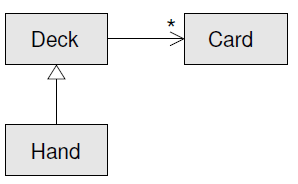

## 18.9 Debugging

## 18.10 Data encapsulation

Objects can represent real-life thingies. But they can also be used to encapsulate data structures and operations which we want to perform more often than once.

## 18.11 Glossary

## 18.12 Exercises